# Linear models (선형모형)

In [1]:
import pandas as pd

In [2]:
automobile = pd.read_csv('../1015_Numpy&Pandas/automobile.csv')
automobile.head()
# symnoling : 위험등급. 3이 최하.

,symboling,normalized_losses,maker,fuel,aspiration,doors,body,wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
1,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
2,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
3,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
4,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.8,8.8,101,5800,23,29,16430


## Seaborn 
 - Python에서 많이 쓰이는 시각화 라이브러리 중 하나.
 - <a href="http://seaborn.pydata.org/">홈페이지</a>

In [3]:
import seaborn
%matplotlib inline

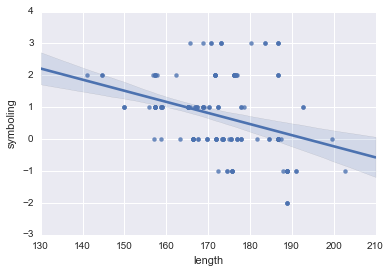

In [4]:
seaborn.regplot(automobile.length, automobile.symboling) #차가 커질수록 전반적인 위험등급이 내려간다. 95% 신뢰구간이다.

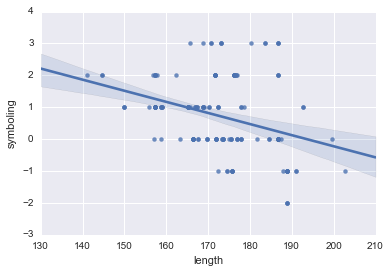

In [5]:
seaborn.regplot('length', 'symboling', data=automobile)

### 회귀선 지우기

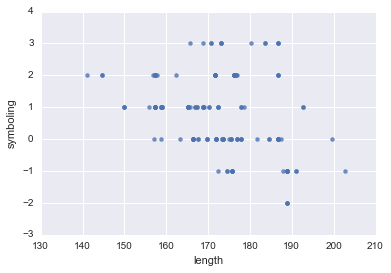

In [6]:
seaborn.regplot('length', 'symboling', data=automobile, fit_reg=False)

### jitter
 - 5점 척도 문항에서 그래프를 보면은 겹쳐져있는 점들이 많아서 보기가 힘들다.
 - 점을 수전증 있는 것처럼 찍어서 겹쳐져있는 것을 확인 할 수 있도록 해준다. 

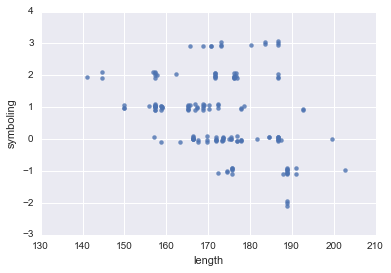

In [7]:
seaborn.regplot('length', 'symboling', data=automobile, fit_reg=False, y_jitter=0.1)

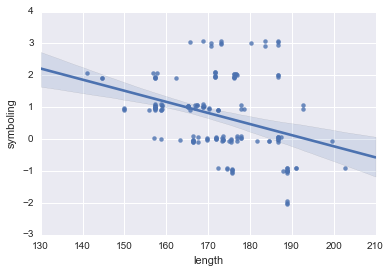

In [8]:
seaborn.regplot('length', 'symboling', data=automobile, y_jitter=0.1)
# y축방향으로 0.1 x축방향으로하면 x_jutter=0.1로 하면된다. (상수는 떠는 정도)

### 신뢰구간 지우기

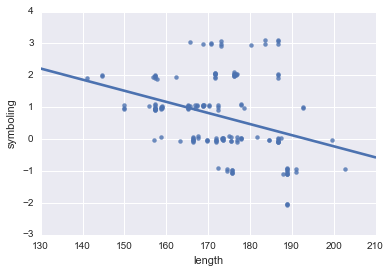

In [9]:
seaborn.regplot('length', 'symboling', data=automobile, y_jitter=0.1, ci=None)

### 색

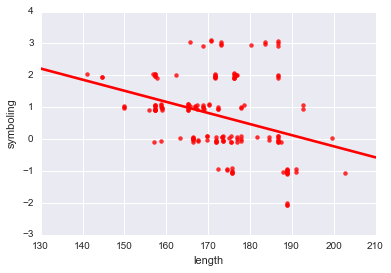

In [10]:
seaborn.regplot('length', 'symboling', data=automobile, y_jitter=0.1, ci=None, color='red')

### 점 색

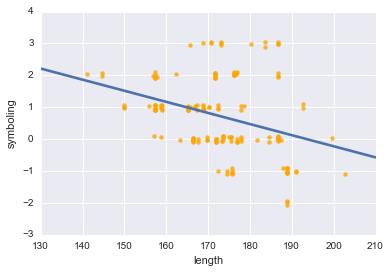

In [11]:
seaborn.regplot('length', 'symboling', data=automobile, y_jitter=0.1, ci=None, scatter_kws={'color': 'orange'})

### 선 색

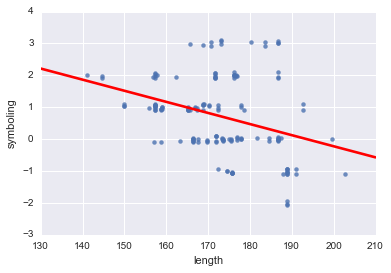

In [12]:
seaborn.regplot('length', 'symboling', data=automobile, y_jitter=0.1, ci=None, line_kws={'color': 'red'})

### 16진수로 색 지정

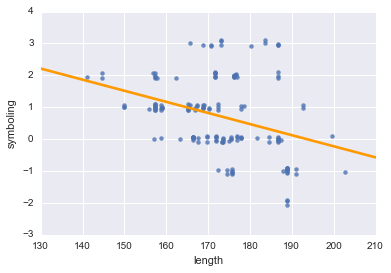

In [13]:
seaborn.regplot('length', 'symboling', data=automobile, y_jitter=0.1, ci=None,
                line_kws={'color': '#FF9900'})

### 점의 모양과 크기
 - 점의 모양은 <a href="http://matplotlib.org/api/markers_api.html#module-matplotlib.markers">링크</a> 참고

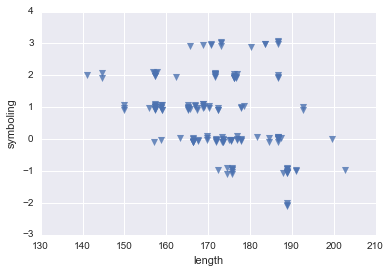

In [14]:
seaborn.regplot('length', 'symboling', data=automobile, y_jitter=0.1, fit_reg=False,
                marker='v', scatter_kws={'s': 50})

### Plot 저장하기.

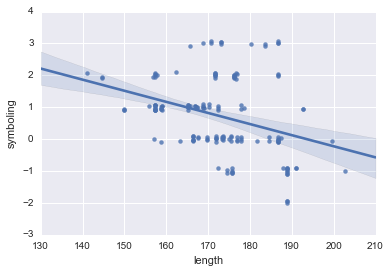

In [21]:
plot = seaborn.regplot('length', 'symboling', data=automobile, y_jitter=0.1)
plot.get_figure().savefig('plot.png')

In [22]:
from pptx import Presentation
from pptx.util import Cm # 단위 cm

In [23]:
prs = Presentation()

In [24]:
slide_layout = prs.slide_layouts[5] # 제목만있는 레이아웃.

In [25]:
slide = prs.slides.add_slide(slide_layout)

In [26]:
slide.shapes.title.text="그림있어요 "

In [31]:
slide.shapes.add_picture('plot.png',left=Cm(2),top=Cm(3),width=Cm(20),height=Cm(15))

In [32]:
prs.save('plot.pptx')

## statsmodels
 - Python에서 통계 분석을 위한 라이브러리. 이름이 statsmodels임에 주의. <a href="http://statsmodels.sourceforge.net/">홈페이지</a>

In [15]:
import statsmodels.formula.api as smf
model = smf.ols('symboling ~ length', data=automobile)
result = model.fit() # 선이 정확하게 어떻게 생겼는지 Fitting 시킨다. 모델에 따른 선을 정확하게 R에서는 바로 Fitting을 한다. 
result.summary()

# 	R-squared: 데이터 전체 분산. 불확실성 중 얼마나 줄일 수 있나. 즉, 11.3%정도 설명할 수 있다. 90%정도는 길이로 설명이 안된다. 
# 	Log-Likelihood : 직접적으로 해석할 수 있는 것은 아니다. 하지만 두가지 모델을 돌렸을때. 0에 가까운 것이 데이터에 잘 맞는 모델이다. 
# AIC: BIC: 또한 0에 가까울수록 좋다.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              symboling   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     20.01
Date:                Sat, 05 Nov 2016   Prob (F-statistic):           1.47e-05
Time:                        11:17:04   Log-Likelihood:                -243.64
No. Observations:                 159   AIC:                             491.3
Df Residuals:                     157   BIC:                             497.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      6.7385      1.345      5.011      0.000         4.082     9.395
length        -0.0348      0.008     -4.474      0.000        -0.050    -0.019
==============================================================================
Omnibus:                       10.632   Durbin-Watson:                   0.909
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.510
Skew:                           0.658   Prob(JB):                      0.00317
Kurtosis:                       2.915   Cond. No.                     2.60e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.6e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
smf.ols('symboling ~ length + price', data=automobile).fit().summary() # 다중회귀분석h

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              symboling   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     12.03
Date:                Sat, 05 Nov 2016   Prob (F-statistic):           1.38e-05
Time:                        11:17:04   Log-Likelihood:                -241.77
No. Observations:                 159   AIC:                             489.5
Df Residuals:                     156   BIC:                             498.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      9.2285      1.858      4.968      0.000         5.559    12.898
length        -0.0522      0.012     -4.392      0.000        -0.076    -0.029
price       4.488e-05   2.33e-05      1.925      0.056     -1.17e-06  9.09e-05
==============================================================================
Omnibus:                       10.367   Durbin-Watson:                   0.835
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               11.225
Skew:                           0.648   Prob(JB):                      0.00365
Kurtosis:                       2.877   Cond. No.                     2.70e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.7e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
automobile.columns

Index(['symboling', 'normalized_losses', 'maker', 'fuel', 'aspiration',
       'doors', 'body', 'wheels', 'engine_location', 'wheel_base', 'length',
       'width', 'height', 'curb_weight', 'engine_type', 'cylinders',
       'engine_size', 'fuel_system', 'bore', 'stroke', 'compression_ratio',
       'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price'],
      dtype='object')

In [18]:
cont_var = automobile.columns[automobile.dtypes != 'object']
cont_var

Index(['symboling', 'normalized_losses', 'wheel_base', 'length', 'width',
       'height', 'curb_weight', 'engine_size', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'price'],
      dtype='object')

In [19]:
cont_data = automobile[cont_var]
cont_data.head()

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,2,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.4,10.0,102,5500,24,30,13950
1,2,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.4,8.0,115,5500,18,22,17450
2,1,158,105.8,192.7,71.4,55.7,2844,136,3.19,3.4,8.5,110,5500,19,25,17710
3,1,158,105.8,192.7,71.4,55.9,3086,131,3.13,3.4,8.3,140,5500,17,20,23875
4,2,192,101.2,176.8,64.8,54.3,2395,108,3.50,2.8,8.8,101,5800,23,29,16430


### 이렇게도 되면 좋겠지만...

In [20]:
smf.ols('symboling ~ .', data=cont_data).fit().summary()

SyntaxError: invalid syntax (<unknown>, line 1)

In [ ]:
cont_var.difference(['symboling'])